<div align="right"><em>Машинне навчання. Лабораторний практикум</em></div>

# Лабораторна робота №4
## Лінійна регресія як задача оптимізації
    
    
---

## Завдання

Необхідно виконати завдання 1-10 сформульовані в лабораторній роботі. 

## Виконання завдання

### Первинний аналіз даних c Pandas

В цій лабораторній роботі ми будемо використовувати дані [SOCR](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights) про зріст та вагу 25 тисяч підлітків.

In [1]:
# Імпортуємо необхідні модулі
import pandas as pd
import numpy as np

# Графічні модулі
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Збільшимо розмір графіків за замовчуванням
plt.rcParams['figure.figsize'] = (10, 6)

Зчитуємо дані про зріст та вагу (*weights_heights.csv*) в об'єкт Pandas DataFrame:

In [3]:
data = pd.read_csv('../data/weights_heights.csv', index_col='Index')

Найчастіше перше, що потрібно зробити після зчитування даних – це подивитися на перші кілька записів. Так можна відслідкувати помилки читання даних (наприклад, якщо замість 10 стовпців вийшов один, в назві якого 9 крапок з комою). Також це дозволяє познайомитися з даними, як мінімум, подивитися на ознаки та їх природу (кількісна, категоріальна і т.д.).

Після цього варто побудувати гістограми розподілу ознак – це знову-таки дозволяє зрозуміти природу ознаки (показниковий розподіл, чи нормальний, чи ще якийсь). Також завдяки гістограмі можна знайти якісь значення, сильно не схожі на інші – "викиди" в даних.
Гістограми зручно будувати методом `plot` Pandas DataFrame з параметром `kind='hist'`.

**Приклад.** Побудуємо гістограму розподілу зросту підлітків з вибірки *data*. Використовуємо метод `plot` для DataFrame *data* з параметром `y='Height'` (це та ознака, розподіл якої ми будуємо).

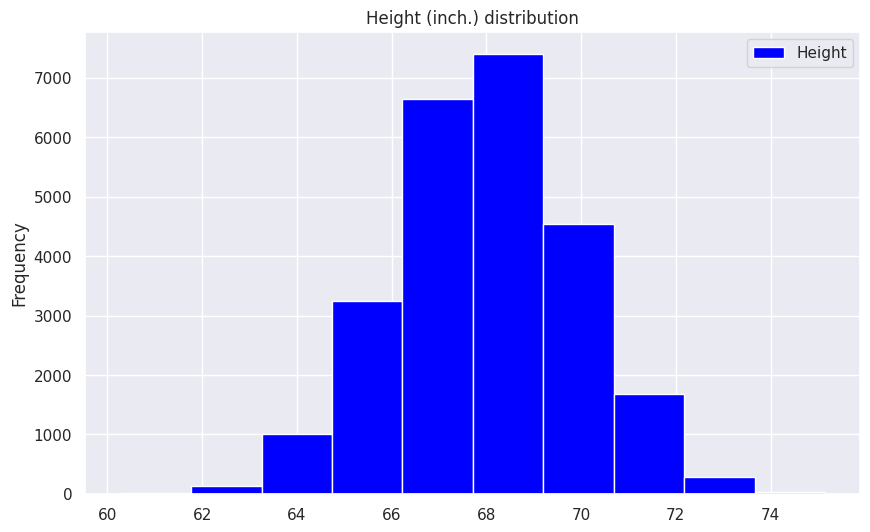

In [4]:
data.plot(y='Height', kind='hist', 
           color='blue',  title='Height (inch.) distribution');

Параметри:

- `y='Height'` – та ознака, розподіл якої ми будуємо

- `kind='hist'` – означає, що будується гістограма

- `color='red'` – колір

**Завдання 1. (1 бал). Подивіться на перші 5 записів за допомогою методу `head` Pandas DataFrame. Побудуйте гістограму розподілу ваги за допомогою методу `plot` Pandas DataFrame. Зробіть гістограму зеленою, підпишіть рисунок.**

In [5]:
# Ваш код тут
data.head()

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


<Axes: title={'center': 'Weight (lbs.) distribution'}, ylabel='Frequency'>

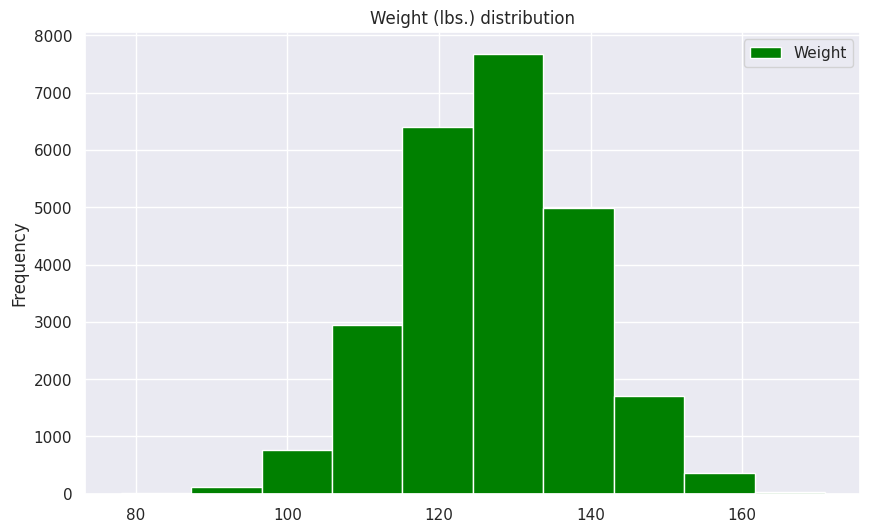

In [6]:
# Ваш код тут
data.plot(y='Weight', kind='hist', 
           color='green',  title='Weight (lbs.) distribution')

Один з ефективних методів первинного аналізу даних – відображення попарних залежностей ознак. Створюється $m\times m$ графіків ($m$ – кількість ознак), де по діагоналі будуються гістограми розподілів ознак, а поза діагоналлю – *scatter plots* залежностей двох ознак. Це можна робити за допомогою методу `scatter_matrix` Pandas Data Frame або `pairplot` бібліотеки Seaborn.

Щоб проілюструвати цей метод, цікавіше додати третю ознаку. Створимо ознаку *Індекс маси тіла* ([BMI](https://en.wikipedia.org/wiki/Body_mass_index)). Для цього скористаємося зручною зв'язкою методу `apply` Pandas DataFrame і lambda-функцій Python.

In [7]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [8]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

**Завдання 2. (1 бал). Побудуйте рисунок, на якому будуть відображені попарні залежності ознак `'Height'`, `'Weight'` та `'BMI'`. Використовуйте метод `pairplot` бібліотеки Seaborn.**

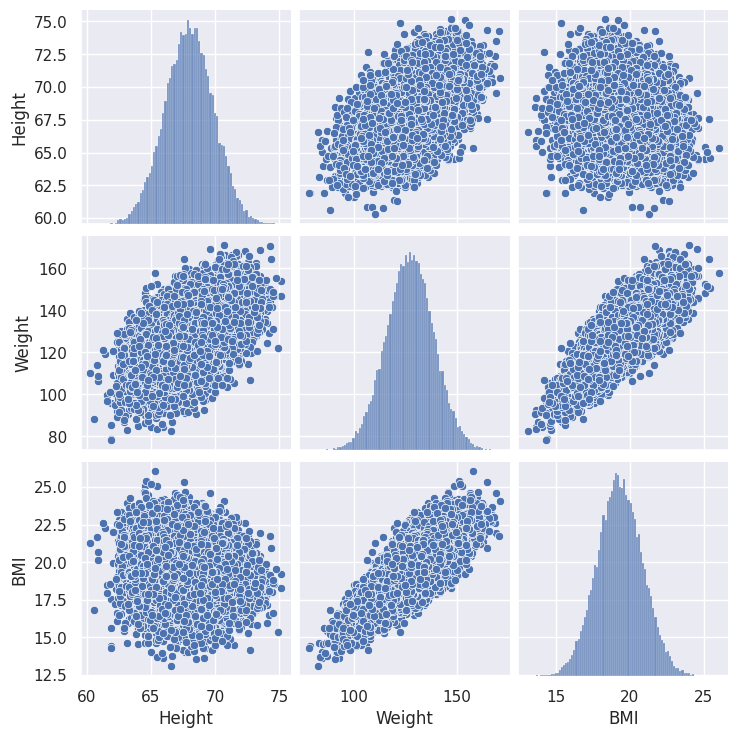

In [9]:
# Ваш код тут
sns.pairplot(data)

Часто при первинному аналізі даних треба досліджувати залежність якоїсь кількісної ознаки від категоріальної (скажімо, зарплати від статі працівника). Тут допоможуть "ящики з вусами" – *boxplots* бібліотеки Seaborn. *Box plot* – це компактний спосіб відобразити статистики кількісної ознаки (середнє і квартилі) для різних значень категоріальної ознаки. Також допомагає відслідковувати "викиди" – спостереження, в яких значення даної кількісної ознаки сильно відрізняються від інших.

**Завдання 3. (1 бал). Створіть в DataFrame *data* нову ознаку `weight_category`, яка буде мати 3 значення: 1 – якщо вага менша ніж 120 фунтів (~ 54 кг.), 3 – якщо вага більша або дорівнює 150 фунтів (~ 68 кг.), 2 – в інших випадках. Побудуйте "ящик з вусами" (*box plot*), що демонструє залежність зросту від вагової категорії. Використовуйте метод `boxplot` бібліотеки Seaborn і метод `apply` Pandas DataFrame. Підпишіть вісь *y* міткою "Зріст", вісь *x* – міткою "Вагова категорія".**

<Axes: xlabel='weight_category', ylabel='Height'>

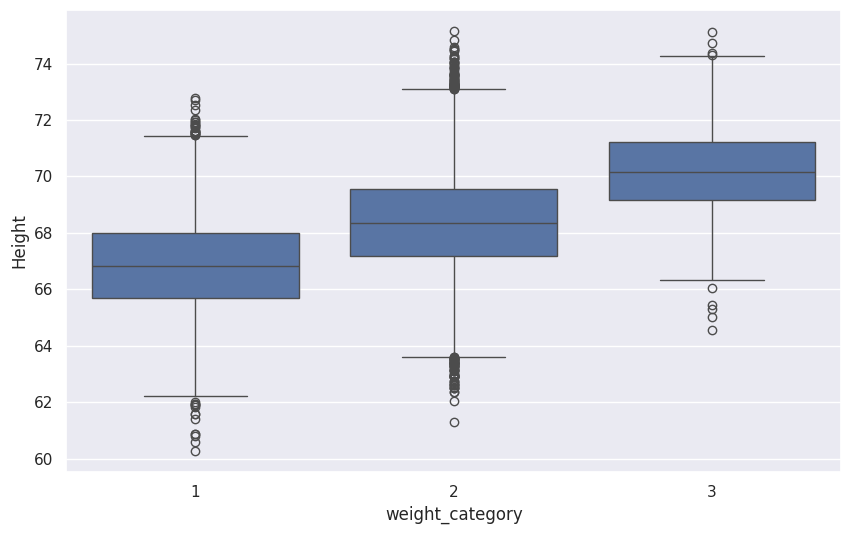

In [10]:
def weight_category(weight):
    if weight < 120:
        return 1
    elif weight >= 150:
        return 3
    else:
        return 2
    # Ваш код тут

data['weight_category'] = data['Weight'].apply(weight_category)
# Ваш код тут
sns.boxplot(data, y='Height', x='weight_category')

**Завдання 4. (1 бал). Побудуйте *scatter plot* залежності зросту від ваги, використовуючи метод `plot` для Pandas DataFrame з параметром `kind='scatter'`. Підпишіть рисунок.**

<Axes: xlabel='Weight', ylabel='Height'>

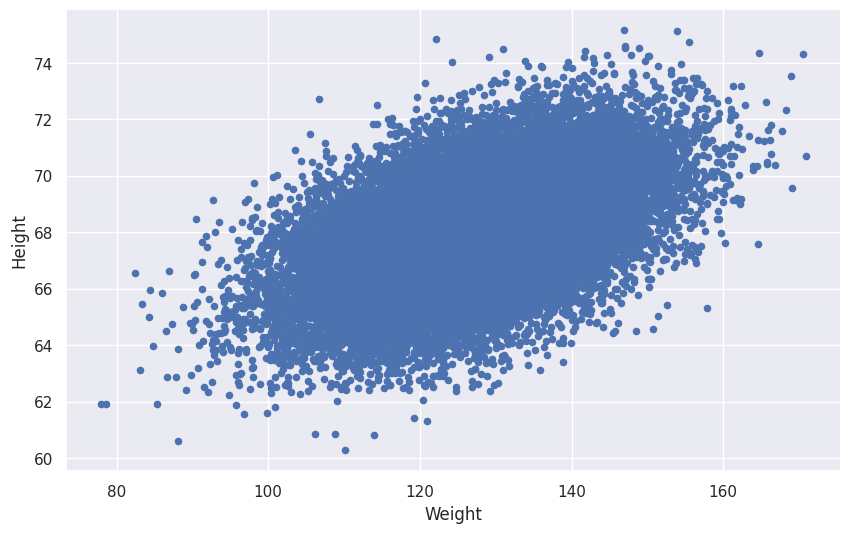

In [11]:
# Ваш код тут
data.plot(kind='scatter', x='Weight', y='Height')

### Мінімізація квадратичної помилки

У простій постановці задача прогнозу значення кількісної ознаки за іншими ознаками (задача регресії) розв'язується мінімізацією квадратичної функції помилки.

**Завдання 5. (1 бал). Напишіть функцію, яка за двома параметрами $w_0$ та $w_1$ обчислює квадратичну помилку наближення залежності зросту $y$ від ваги $x$ прямою лінією $y = w_0 + w_1 \cdot x$:
$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
Тут $n$ – кількість спостережень в наборі даних, $y_i$ і $x_i$ – зріст і вага $i$-ої людини в наборі даних.**

In [33]:
# Ваш код тут
def square_error(w_0, w_1):
    err = 0
    for ind in range(len(data)):
        err += np.power(data['Height'].iloc[ind] - (w_0 + (w_1 * data['Weight'].iloc[ind])), 2)
    return err

Отже, ми розв'язуємо задачу: як через хмару точок, що відповідають спостереженням в нашому наборі даних, в просторі ознак "Зріст" та "Вага" провести пряму лінію так, щоб мінімізувати функцію з завдання 5. Для початку давайте відобразимо хоч якісь прямі і переконаємося, що вони погано передають залежність зросту від ваги.

**Завдання 6. (1 бал). Проведіть на графіку з завдання 4 дві прямі, що відповідають значенням параметрів $(w_0, w_1) = (60, 0.05)$ і $(w_0, w_1) = (50, 0.16)$. Використовуйте метод `plot` з `matplotlib.pyplot`, а також метод `linspace` бібліотеки NumPy. Підпишіть осі та графік.**

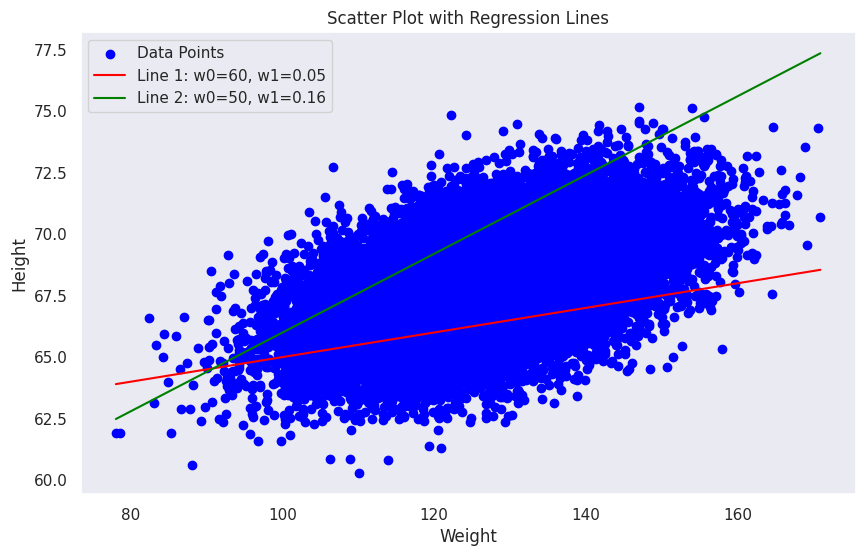

In [36]:
# Ваш код тут
plt.figure(figsize=(10, 6))

plt.scatter(data['Weight'], data['Height'], color='blue', label='Data Points')


weight_range = np.linspace(data['Weight'].min(), data['Weight'].max(), 100)  
line1 = 60 + 0.05 * weight_range 
line2 = 50 + 0.16 * weight_range 

plt.plot(weight_range, line1, color='red', label=f'Line 1: w0={60}, w1={0.05}')
plt.plot(weight_range, line2, color='green', label=f'Line 2: w0={50}, w1={0.16}')

plt.title('Scatter Plot with Regression Lines')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()
plt.grid()

plt.show()

Мінімізація квадратичної функції помилки – відносно проста задача, оскільки функція опукла. Для такої задачі існує багато методів оптимізації. Подивимося, як функція помилки залежить від одного параметра (нахил прямої), якщо другий параметр (вільний член) зафіксувати.

**Завдання 7. (1 бал). Побудуйте графік залежності функції помилки, обчисленою в завданні 5, від параметра $w_1$ при $w_0=50$. Підпишіть осі і графік.**

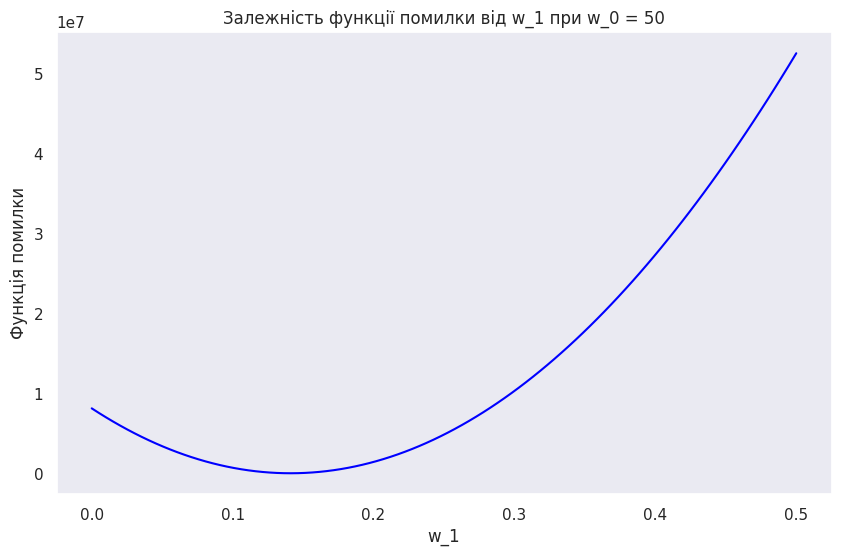

In [35]:
# Ваш код тут
w_0 = 50
w_1_values = np.linspace(0, 0.5, 100)

errors = [square_error(w_0, w_1) for w_1 in w_1_values]

plt.figure(figsize=(10, 6))
plt.plot(w_1_values, errors, color='blue')
plt.title('Залежність функції помилки від w_1 при w_0 = 50')
plt.xlabel('w_1')
plt.ylabel('Функція помилки')
plt.grid()
plt.show()

Тепер методом оптимізації знайдемо "оптимальний" нахил прямої, що наближає залежність зросту від ваги, при фіксованому коефіцієнті $w_0 = 50$.

**Завдання 8. (1 бал). За допомогою функції `minimize_scalar` з `scipy.optimize` знайдіть мінімум функції, визначеної в завданні  5, для значень параметра $w_1$ в діапазоні [-5, 5]. Проведіть на графіку з завдання 4 пряму, що відповідає значенням параметрів $(w_0, w_1) = $ $(50, w_1\_opt)$, де $w_1\_opt$ – знайдене оптимальне значення параметра $w_1$.**

In [38]:
# Ваш код тут
from scipy.optimize import minimize_scalar
def square_error(w_1):
    w_0 = 50 
    err = 0
    for ind in range(len(data)):
        err += np.power(data['Height'].iloc[ind] - (w_0 + (w_1 * data['Weight'].iloc[ind])), 2)
    return err

result = minimize_scalar(square_error, bounds=(-5, 5), method='bounded')
result

 message: Solution found.
 success: True
  status: 0
     fun: 79512.21728699487
       x: 0.1410920372883444
     nit: 6
    nfev: 6

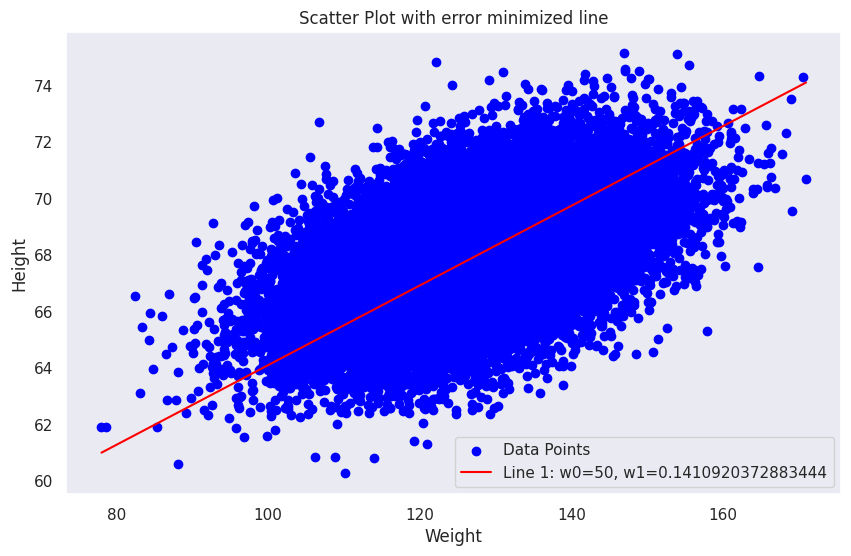

In [40]:
# Ваш код тут
plt.figure(figsize=(10, 6))

plt.scatter(data['Weight'], data['Height'], color='blue', label='Data Points')


weight_range = np.linspace(data['Weight'].min(), data['Weight'].max(), 100)  
line1 = 50 + result.x * weight_range 

plt.plot(weight_range, line1, color='red', label=f'Line 1: w0={50}, w1={result.x}')

plt.title('Scatter Plot with error minimized line')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()
plt.grid()

plt.show()

Під час аналізу багатовимірних даних хочеться отримати інтуїтивне уявлення про природу даних за допомогою візуалізації. На жаль, при кількості ознак більшій ніж 3 такі рисунки створити неможливо. На практиці для візуалізації даних в 2D і 3D в даних виділяють 2 або, відповідно, 3 головні компоненти та відображають дані на площині або в просторі.

Подивимося, як в Python створювати 3D рисунки, на прикладі відображення функції $z(x,y) = sin(\sqrt{x^2+y^2})$ для значень $x$ і $y$ з діапазону [-5,5] з кроком 0.25.

In [41]:
from mpl_toolkits.mplot3d import Axes3D

Створюємо об'єкти типу `matplotlib.figure.Figure` (рисунок) і `matplotlib.axes._subplots.Axes3DSubplot` (вісь).

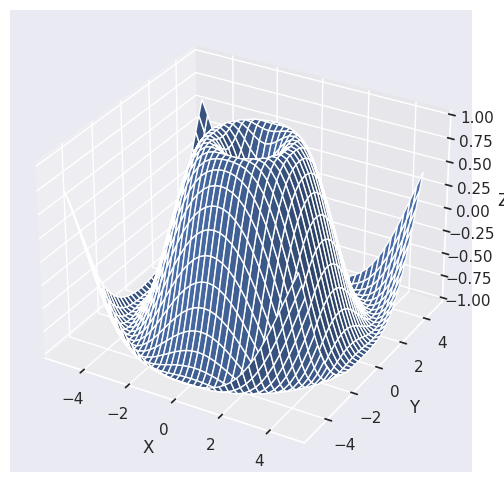

In [42]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Створюємо масиви NumPy з координатами точок по осях X і У.
# Використовуємо метод meshgrid, який за векторами координат
# створює матрицю координат. Задаємо потрібну функцію Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Нарешті, використовуємо метод plot_surface об'єкта 
# типу Axes3DSubplot. Також підписуємо осі.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

**Завдання 9. (1 бал). Побудуйте 3D-графік залежності функції помилки, обчисленою в завданні 5 від параметрів $w_0$ і $w_1$. Підпишіть вісь $x$ міткою "Intercept", вісь $y$ – міткою "Slope", a вісь $z$ – міткою «Error».**

In [43]:
def square_error(w_0, w_1):
    err = 0
    for ind in range(len(data)):
        err += np.power(data['Height'].iloc[ind] - (w_0 + (w_1 * data['Weight'].iloc[ind])), 2)
    return err

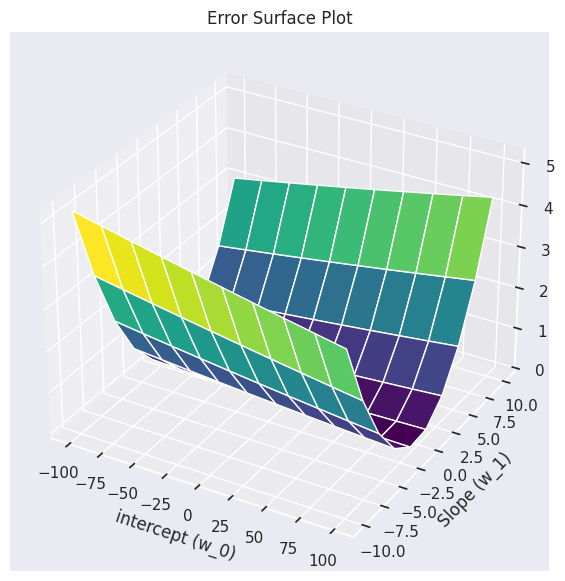

In [45]:
# Ваш код тут
w_0_values = np.linspace(-100, 100, 10)
w_1_values = np.linspace(-10, 10, 10)
W_0, W_1 = np.meshgrid(w_0_values, w_1_values)

errors = np.array([[square_error(w_0, w_1) for w_0 in w_0_values] for w_1 in w_1_values])

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W_0, W_1, errors, cmap='viridis')

ax.set_xlabel('intercept (w_0)')
ax.set_ylabel('Slope (w_1)')
ax.set_zlabel('Error')
ax.set_title('Error Surface Plot')

plt.show()

**Завдання 10. (1 бал). За допомогою функції `minimize` з `scipy.optimize` знайдіть мінімум функції, визначеної в завданні 5, для значень параметра $w_0$ в діапазоні [-100,100] і $w_1$ – в діапазоні [-5, 5]. Початкова точка – $(w_0, w_1) = (0, 0)$. Використовуйте метод оптимізації L-BFGS-B (параметр `method` методу `minimize`). Проведіть на графіку з завдання 4 пряму, що відповідає знайденим оптимальним значенням параметрів $w_0$ та $w_1$. Підпишіть осі і графік.**

In [46]:
def square_error(params):
    w_0, w_1 = params
    err = 0
    for ind in range(len(data)):
        err += np.power(data['Height'].iloc[ind] - (w_0 + (w_1 * data['Weight'].iloc[ind])), 2)
    return err

In [47]:
# Ваш код тут
from scipy.optimize import minimize
bounds = [(-100, 100), (-5, 5)]

initial_guess = [0, 0]

result = minimize(square_error, initial_guess, method='L-BFGS-B', bounds=bounds)

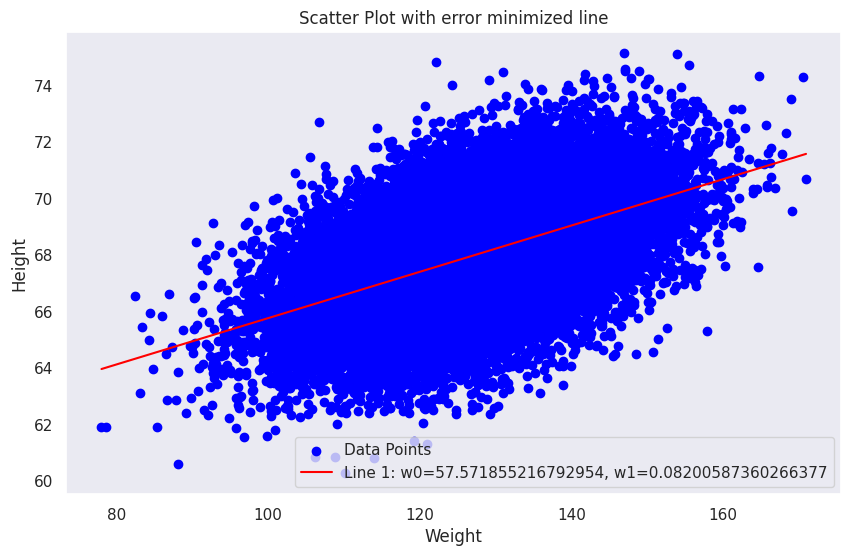

In [49]:
# Ваш код тут
plt.figure(figsize=(10, 6))

plt.scatter(data['Weight'], data['Height'], color='blue', label='Data Points')


weight_range = np.linspace(data['Weight'].min(), data['Weight'].max(), 100)  
line1 = result.x[0] + result.x[1] * weight_range 

plt.plot(weight_range, line1, color='red', label=f'Line 1: w0={result.x[0]}, w1={result.x[1]}')

plt.title('Scatter Plot with error minimized line')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()
plt.grid()

plt.show()